In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("chop", 200)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('../input/premier-league-20-21/EPL_20_21.csv')

# EDA

In [3]:
df.shape

(532, 18)

In [4]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,0.0,1,1,0.0,0.0,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,0.0,0,0,0.0,0.0,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,0.0,0,0,0.0,0.0,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,0.0,0,0,0.0,0.0,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,0.0,0,0,0.0,0.0,3,0


In [5]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.0,532.0,532.0,532.000000,532.0,532.0,532.000000,532.0,532.0,532.0,532.0,532.0,532.0,532.0
mean,0.0,0.0,0.0,1411.443609,0.0,0.0,717.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,1043.171856,0.0,0.0,631.372522,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,426.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1345.000000,0.0,0.0,573.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,2303.500000,0.0,0.0,1129.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,3420.000000,0.0,0.0,3214.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning
* Check for missing values
* check types about the dataset
* Remove Unnecessary Columns
* Check for duplicate rows
* Remove duplicate rows
* Check for Inconsistencies

In [6]:
# Check for missing values
print(df.isnull().sum())

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64


In [7]:
#check types about the dataset
print(df.dtypes)

Name                      object
Club                      object
Nationality               object
Position                  object
Age                        int64
Matches                    int64
Starts                     int64
Mins                       int64
Goals                      int64
Assists                    int64
Passes_Attempted           int64
Perc_Passes_Completed    float64
Penalty_Goals              int64
Penalty_Attempted          int64
xG                       float64
xA                       float64
Yellow_Cards               int64
Red_Cards                  int64
dtype: object


In [8]:
#Remove Unnecessary Columns
df = df.drop(['xG', 'xA'], axis=1)

In [9]:
# Rename columns
df = df.rename(columns={'Perc_Passes_Completed': 'Passes_Completed'})

In [10]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

0


In [11]:
#Check for Inconsistencies
print(df['Position'].unique())
print(df['Nationality'].unique())

['MF,FW' 'GK' 'FW' 'DF' 'MF' 'FW,MF' 'FW,DF' 'DF,MF' 'MF,DF' 'DF,FW']
['ENG' 'SEN' 'GER' 'ESP' 'FRA' 'ITA' 'BRA' 'CRO' 'USA' 'DEN' 'MAR' 'SCO'
 'ARG' 'POR' 'BEL' 'ALG' 'UKR' 'NED' 'SWE' 'URU' 'SRB' 'WAL' 'CIV' 'NGA'
 'EGY' 'TUR' 'CMR' 'GUI' 'SUI' 'JPN' 'IRL' 'GRE' 'NIR' 'GHA' 'AUT' 'JAM'
 'RSA' 'CZE' 'POL' 'PAR' 'COD' 'KOR' 'COL' 'GAB' 'NOR' 'AUS' 'BIH' 'ISL'
 'MKD' 'BFA' 'ZIM' 'SVK' 'MEX' 'CAN' 'MLI' 'IRN' 'NZL' 'MTN' 'SKN']


In [12]:
print(df.dtypes)

Name                  object
Club                  object
Nationality           object
Position              object
Age                    int64
Matches                int64
Starts                 int64
Mins                   int64
Goals                  int64
Assists                int64
Passes_Attempted       int64
Passes_Completed     float64
Penalty_Goals          int64
Penalty_Attempted      int64
Yellow_Cards           int64
Red_Cards              int64
dtype: object


In [13]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Passes_Completed,Penalty_Goals,Penalty_Attempted,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,0.0,1,1,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,0.0,0,0,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,0.0,0,0,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,0.0,0,0,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,0.0,0,0,3,0


In [14]:
df.shape

(532, 16)

# Descriptive Statistics
* summary statistics
* Distribution of Categorical Variables
* Visualizing Distributions
* Position-wise summary

In [15]:
# Basic summary statistics
print(df.describe())

         Age  Matches  Starts         Mins  Goals  Assists  Passes_Attempted  \
count  532.0    532.0   532.0   532.000000  532.0    532.0        532.000000   
mean     0.0      0.0     0.0  1411.443609    0.0      0.0        717.750000   
std      0.0      0.0     0.0  1043.171856    0.0      0.0        631.372522   
min      0.0      0.0     0.0     0.000000    0.0      0.0          0.000000   
25%      0.0      0.0     0.0   426.000000    0.0      0.0          0.000000   
50%      0.0      0.0     0.0  1345.000000    0.0      0.0        573.500000   
75%      0.0      0.0     0.0  2303.500000    0.0      0.0       1129.500000   
max      0.0      0.0     0.0  3420.000000    0.0      0.0       3214.000000   

       Passes_Completed  Penalty_Goals  Penalty_Attempted  Yellow_Cards  \
count             532.0          532.0              532.0         532.0   
mean                0.0            0.0                0.0           0.0   
std                 0.0            0.0                

In [16]:
#Distribution of posostion
print(df['Position'].value_counts())

#Distribution of Nationality
print(df['Nationality'].value_counts())

Position
DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
FW,DF      6
DF,FW      6
Name: count, dtype: int64
Nationality
ENG    192
FRA     31
BRA     27
ESP     26
POR     21
IRL     21
SCO     20
NED     16
WAL     12
BEL     11
GER      9
CIV      8
ARG      8
NGA      7
USA      6
SUI      6
DEN      6
TUR      5
EGY      5
SWE      5
GHA      5
POL      5
COL      5
NIR      5
SEN      5
ITA      5
SRB      4
AUS      4
ISL      3
NOR      3
JAM      3
CZE      3
ALG      3
CRO      2
MAR      2
MLI      2
CMR      2
UKR      2
RSA      2
GAB      2
PAR      2
COD      2
JPN      2
SVK      2
URU      1
GRE      1
AUT      1
KOR      1
GUI      1
BIH      1
MKD      1
ZIM      1
BFA      1
MEX      1
CAN      1
IRN      1
NZL      1
MTN      1
SKN      1
Name: count, dtype: int64


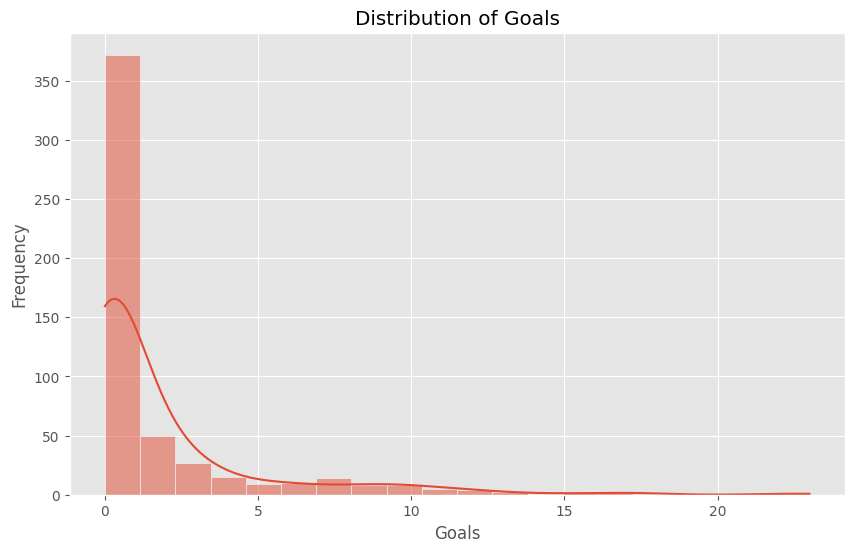

In [17]:
# Example: Histogram of Goals
plt.figure(figsize=(10, 6))
sns.histplot(df['Goals'], bins=20, kde=True)
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Position-wise summary
position_summary = df.groupby('Position').agg({
    'Goals': 'mean',
    'Assists': 'mean',
    'Passes_Attempted': 'mean',
}).reset_index()

print(position_summary)

  Position  Goals  Assists  Passes_Attempted
0       DF    0.0      0.0        909.337079
1    DF,FW    0.0      0.0        368.166667
2    DF,MF    0.0      0.0        880.066667
3       FW    0.0      0.0        384.037037
4    FW,DF    0.0      0.0        446.000000
5    FW,MF    0.0      0.0        447.702128
6       GK    0.0      0.0        568.547619
7       MF    0.0      0.0        869.888889
8    MF,DF    0.0      0.0        964.692308
9    MF,FW    0.0      0.0        538.277778


# Player Analysis
* Explore the distribution of players' ages.
* Analyze the distribution of players across different positions.
* Check the nationality distribution in the dataset.

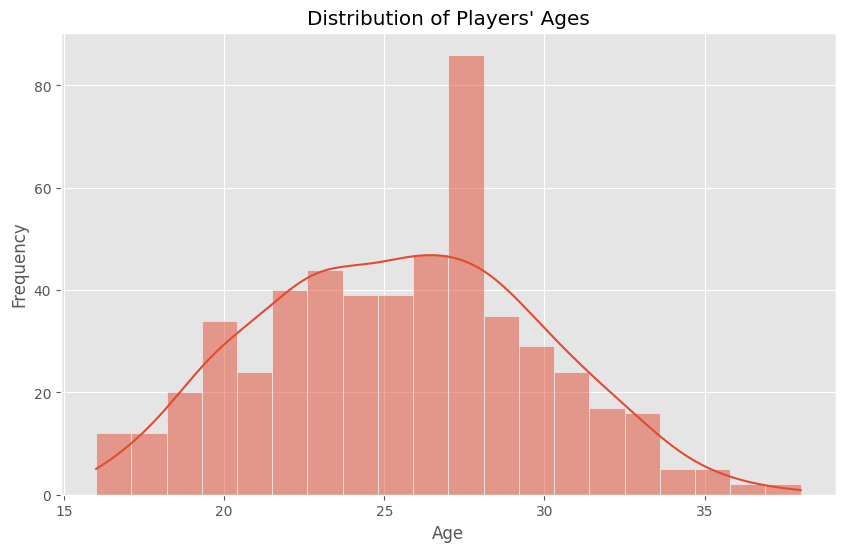

In [19]:
# Histogram of players' ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Players\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

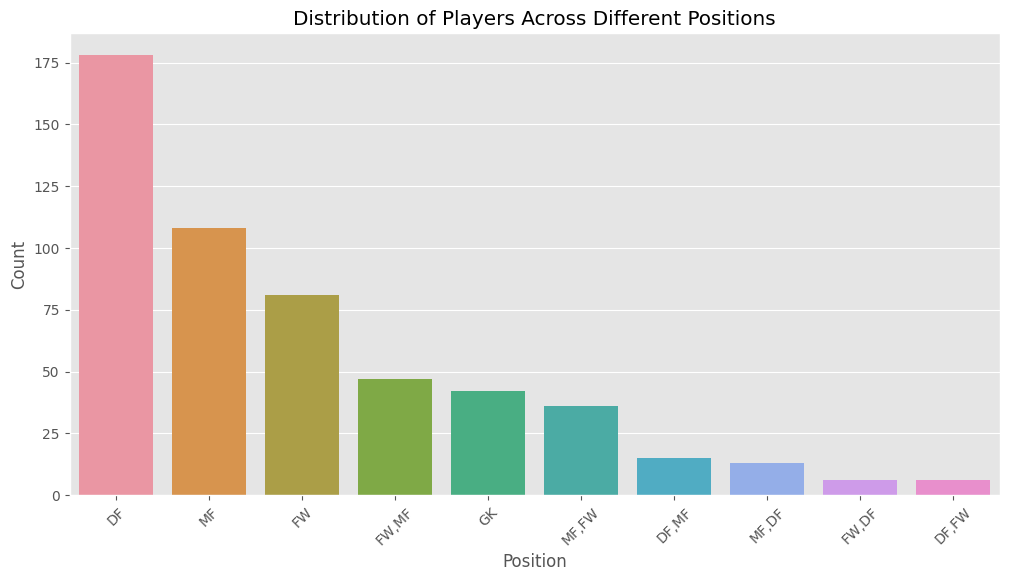

In [20]:
# Countplot of players' positions
plt.figure(figsize=(12, 6))
sns.countplot(x='Position', data=df, order=df['Position'].value_counts().index)
plt.title('Distribution of Players Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

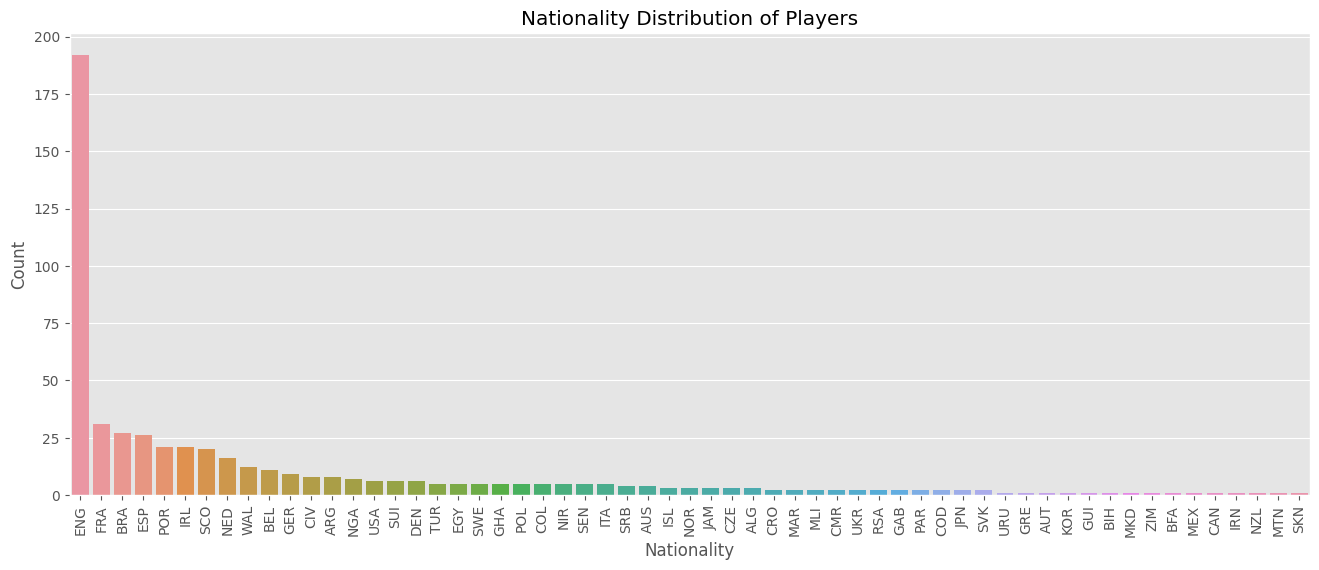

In [21]:
# Countplot of players' nationalities
plt.figure(figsize=(16, 6))
sns.countplot(x='Nationality', data=df, order=df['Nationality'].value_counts().index)
plt.title('Nationality Distribution of Players')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Club Analysis:
* Explore the distribution of players across different clubs.
* Analyze the performance of each club based on various metrics.
* Visualize each metric

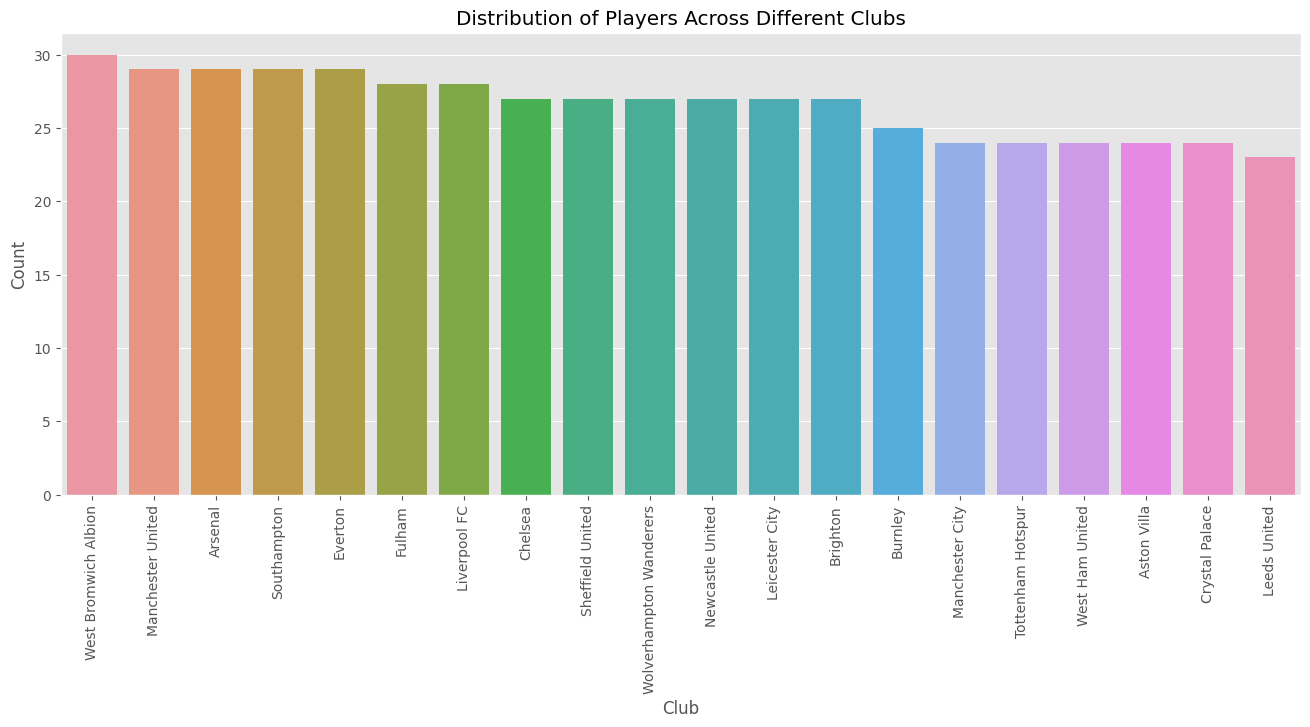

In [22]:
# Countplot of players across different clubs
plt.figure(figsize=(16, 6))
sns.countplot(x='Club', data=df, order=df['Club'].value_counts().index)
plt.title('Distribution of Players Across Different Clubs')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Group by club and calculate mean for selected metrics
club_performance = df.groupby('Club').agg({
    'Goals': 'mean',
    'Assists': 'mean',
    'Passes_Attempted': 'mean',
    'Penalty_Attempted': 'mean',
    'Yellow_Cards': 'mean',
    'Red_Cards' : 'mean'
}).reset_index()

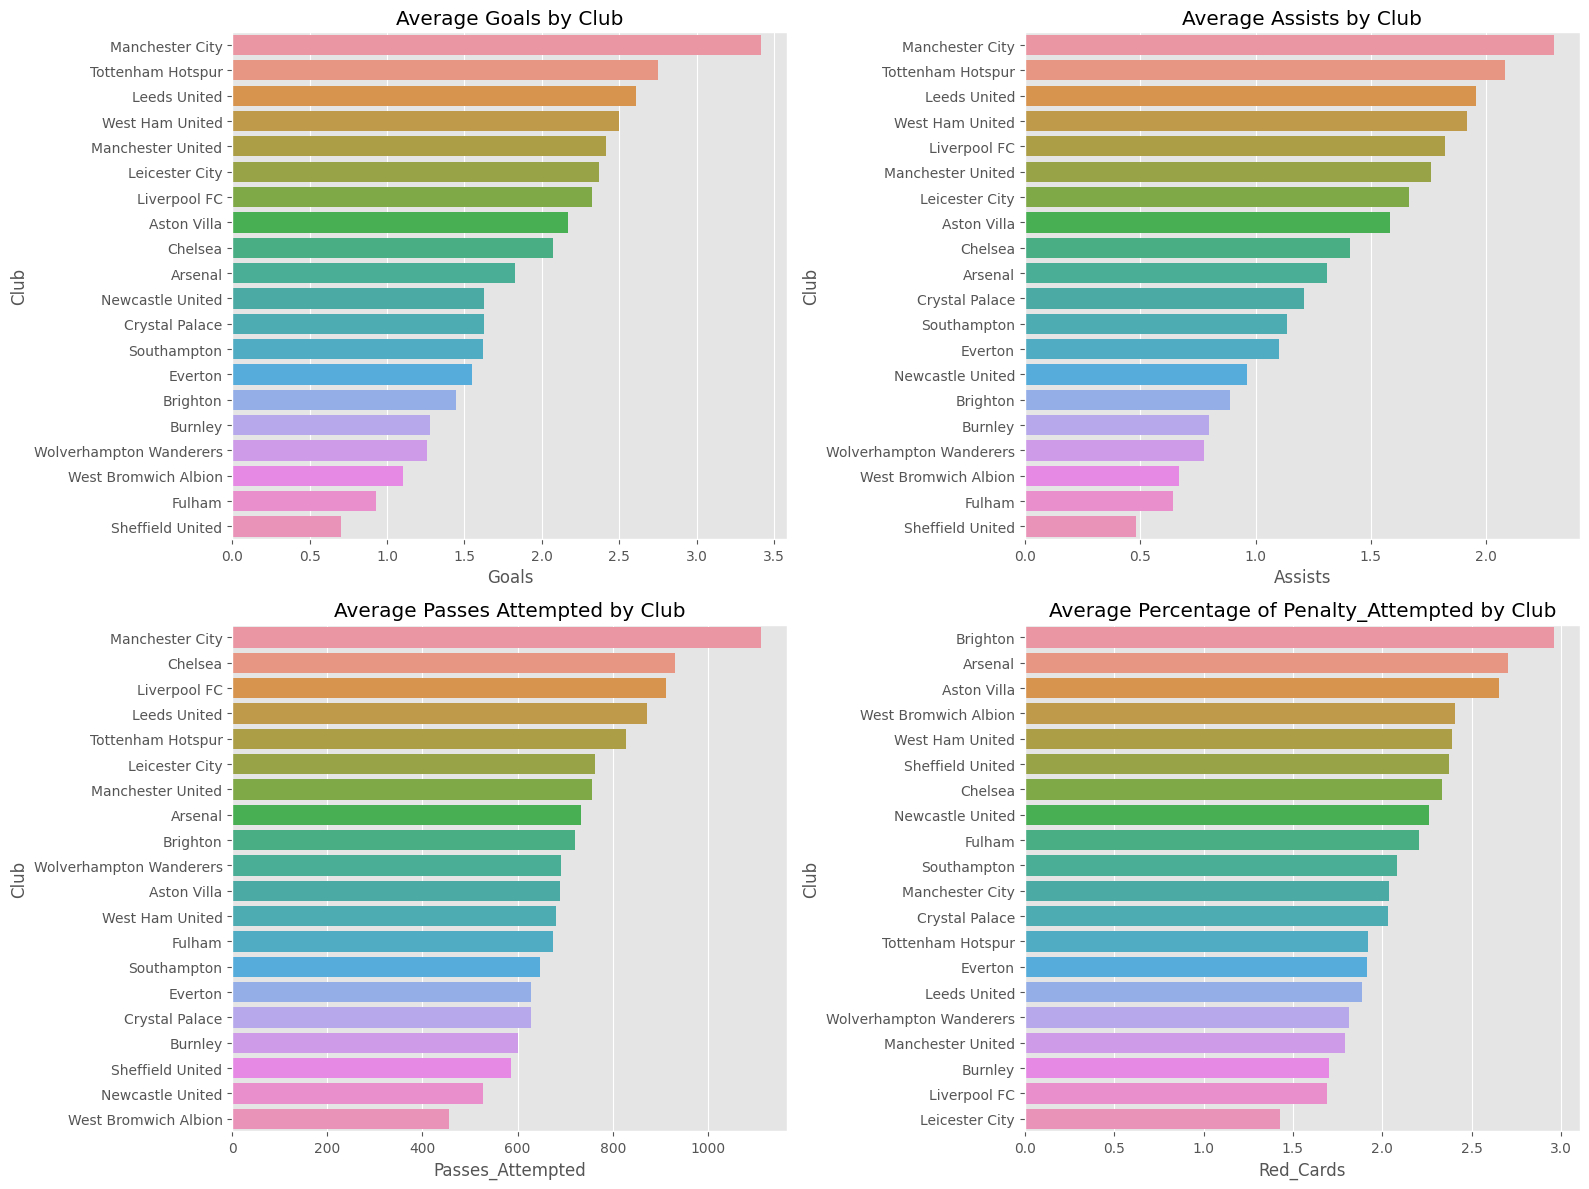

In [ ]:
# Create a bar plot for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.barplot(x='Goals', y='Club', data=club_performance.sort_values('Goals', ascending=False), ax=axes[0, 0])
axes[0, 0].set_title('Average Goals by Club')

sns.barplot(x='Assists', y='Club', data=club_performance.sort_values('Assists', ascending=False), ax=axes[0, 1])
axes[0, 1].set_title('Average Assists by Club')

sns.barplot(x='Passes_Attempted', y='Club', data=club_performance.sort_values('Passes_Attempted', ascending=False), ax=axes[1, 0])
axes[1, 0].set_title('Average Passes Attempted by Club')

sns.barplot(x='Penalty_Attempted', y='Club', data=club_performance.sort_values('Penalty_Attempted', ascending=False), ax=axes[1, 1])
axes[1, 1].set_title('Average Percentage of Penalty_Attempted by Club')

sns.barplot(x='Yellow_Cards', y='Club', data=club_performance.sort_values('Yellow_Cards', ascending=False), ax=axes[1, 1])
axes[1, 1].set_title('Average Percentage of Penalty_Attempted by Club')

sns.barplot(x='Red_Cards', y='Club', data=club_performance.sort_values('Red_Cards', ascending=False), ax=axes[1, 1])
axes[1, 1].set_title('Average Percentage of Penalty_Attempted by Club')

plt.tight_layout()
plt.show()

# Performance Metrics
* Analyze the distribution of goals, assists, and other performance metrics.
* Check for any correlation between different performance metrics.

In [ ]:
# Select relevant columns for performance metrics
performance_metrics = df[['Goals', 'Assists', 'Passes_Attempted']]

# Pairplot for performance metrics
sns.pairplot(performance_metrics)
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

Each scatter plot represents the relationship between two variables, and diagonal histograms show the distribution of each individual variable.

# Correlation Analysis
* Check for correlations between different performance metrics.
* Identify any interesting patterns or relationships.

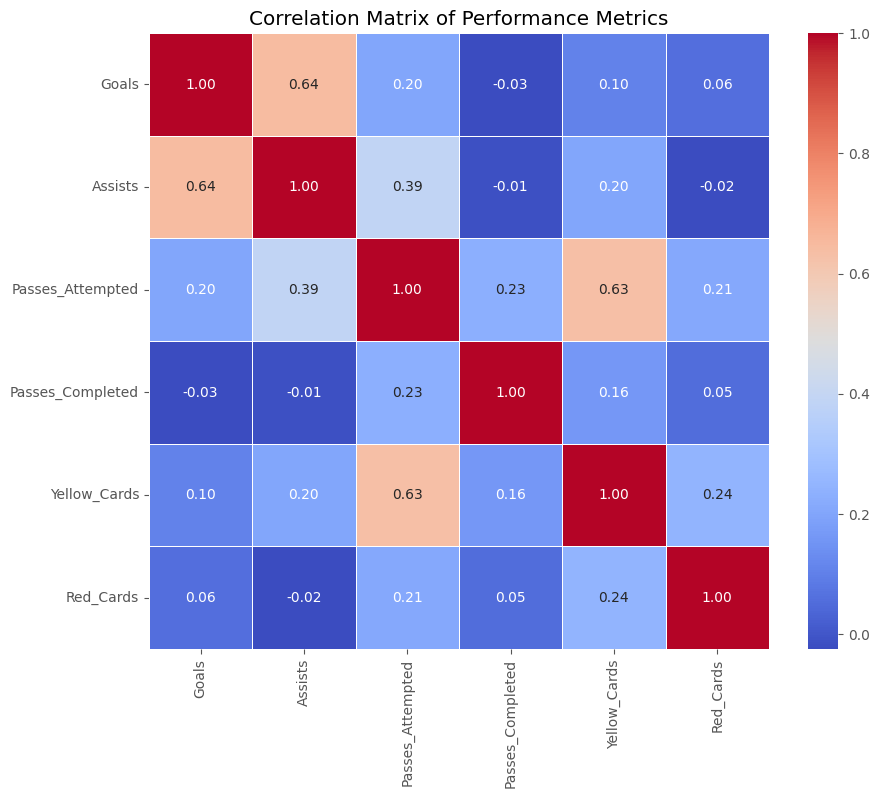

In [ ]:
# Select relevant performance metrics for correlation analysis
performance_metrics = df[['Goals', 'Assists', 'Passes_Attempted', 'Passes_Completed', 'Yellow_Cards', 'Red_Cards']]

# Calculate the correlation matrix
correlation_matrix = performance_metrics.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

heatmap to display the correlation matrix of the performance metrics. The values in the heatmap represent the correlation coefficients between pairs of metrics.

# Passing Analysis
* Analyze passing statistics such as passes attempted, percentage of passes completed, etc.
* Visualize passing performance using appropriate plots.

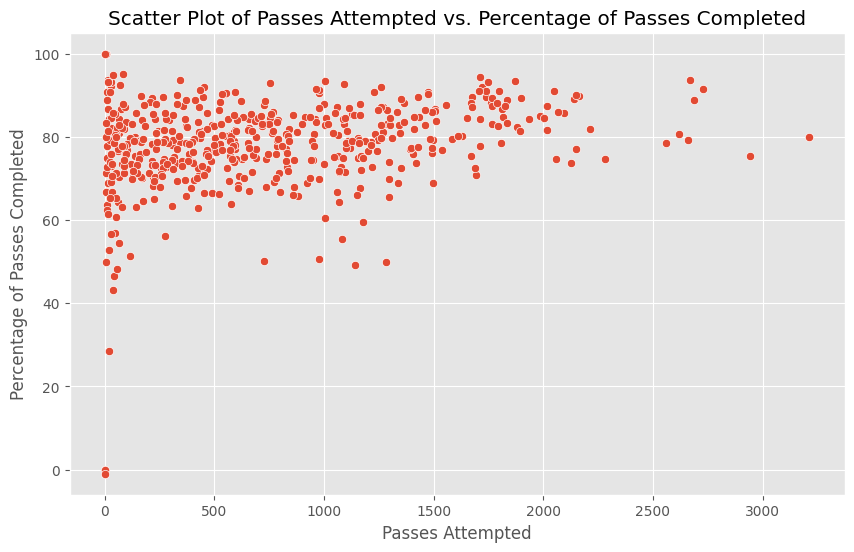

<Figure size 1000x600 with 0 Axes>

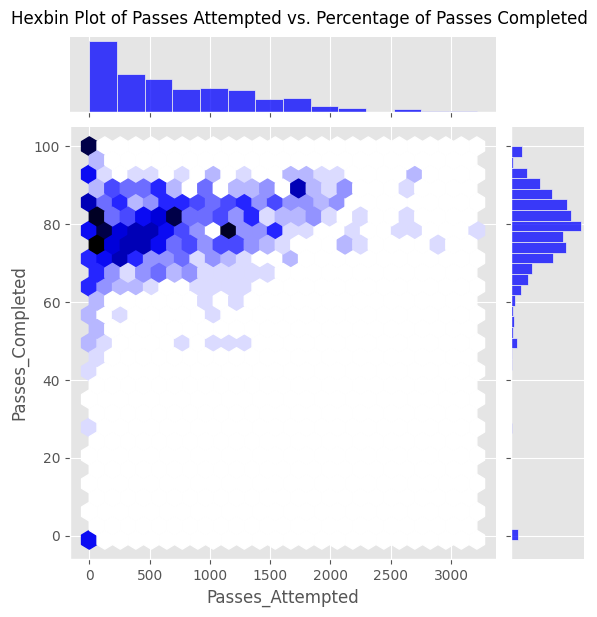

In [27]:
# Select passing-related columns
passing_data = df[['Passes_Attempted', 'Passes_Completed']]

# Scatter plot of Passes_Attempted vs. Perc_Passes_Completed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Passes_Attempted', y='Passes_Completed', data=passing_data)
plt.title('Scatter Plot of Passes Attempted vs. Percentage of Passes Completed')
plt.xlabel('Passes Attempted')
plt.ylabel('Percentage of Passes Completed')
plt.show()

# Hexbin plot for a better view of the density of points
plt.figure(figsize=(10, 6))
sns.jointplot(x='Passes_Attempted', y='Passes_Completed', data=passing_data, kind='hex', color='blue')
plt.suptitle('Hexbin Plot of Passes Attempted vs. Percentage of Passes Completed', y=1.02)
plt.show()


# Player-specific Analysis
Lets focusing on the specific players who are best during the season 20-21(Kevin De Bruyne, Ruben Dias, Salah, Bukayo Saka, Harry Kane, Mason Mount, Son, Bruno Fernandes, Jack Grealish).

In [28]:
from tabulate import tabulate

# List of specific player names
specific_players = ['Kevin De Bruyne', 'Ruben Dias', 'Salah', 'Bukayo Saka', 'Harry Kane', 'Mason Mount', 'Son', 'Bruno Fernandes', 'Jack Grealish']

# Filter the DataFrame for the specific players
specific_players_data = df[df['Name'].isin(specific_players)]

# Display selected metrics for the specific players in a table
selected_metrics = ['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Goals', 'Assists', 'Passes_Attempted', 'Passes_Completed']
specific_players_info = specific_players_data[selected_metrics]

# Print the table
print(tabulate(specific_players_info, headers='keys', tablefmt='pretty'))

+-----+-----------------+-------------------+-------------+----------+-----+---------+-------+---------+------------------+------------------+
|     |      Name       |       Club        | Nationality | Position | Age | Matches | Goals | Assists | Passes_Attempted | Passes_Completed |
+-----+-----------------+-------------------+-------------+----------+-----+---------+-------+---------+------------------+------------------+
|  0  |   Mason Mount   |      Chelsea      |     ENG     |  MF,FW   | 21  |   36    |   6   |    5    |       1881       |       82.3       |
| 34  | Kevin De Bruyne |  Manchester City  |     BEL     |    MF    | 29  |   25    |   6   |   12    |       1406       |       76.0       |
| 51  | Bruno Fernandes | Manchester United |     POR     |    MF    | 25  |   37    |  18   |   12    |       2283       |       74.6       |
| 162 |   Harry Kane    | Tottenham Hotspur |     ENG     |    FW    | 27  |   35    |  23   |   14    |       937        |       70.1       |

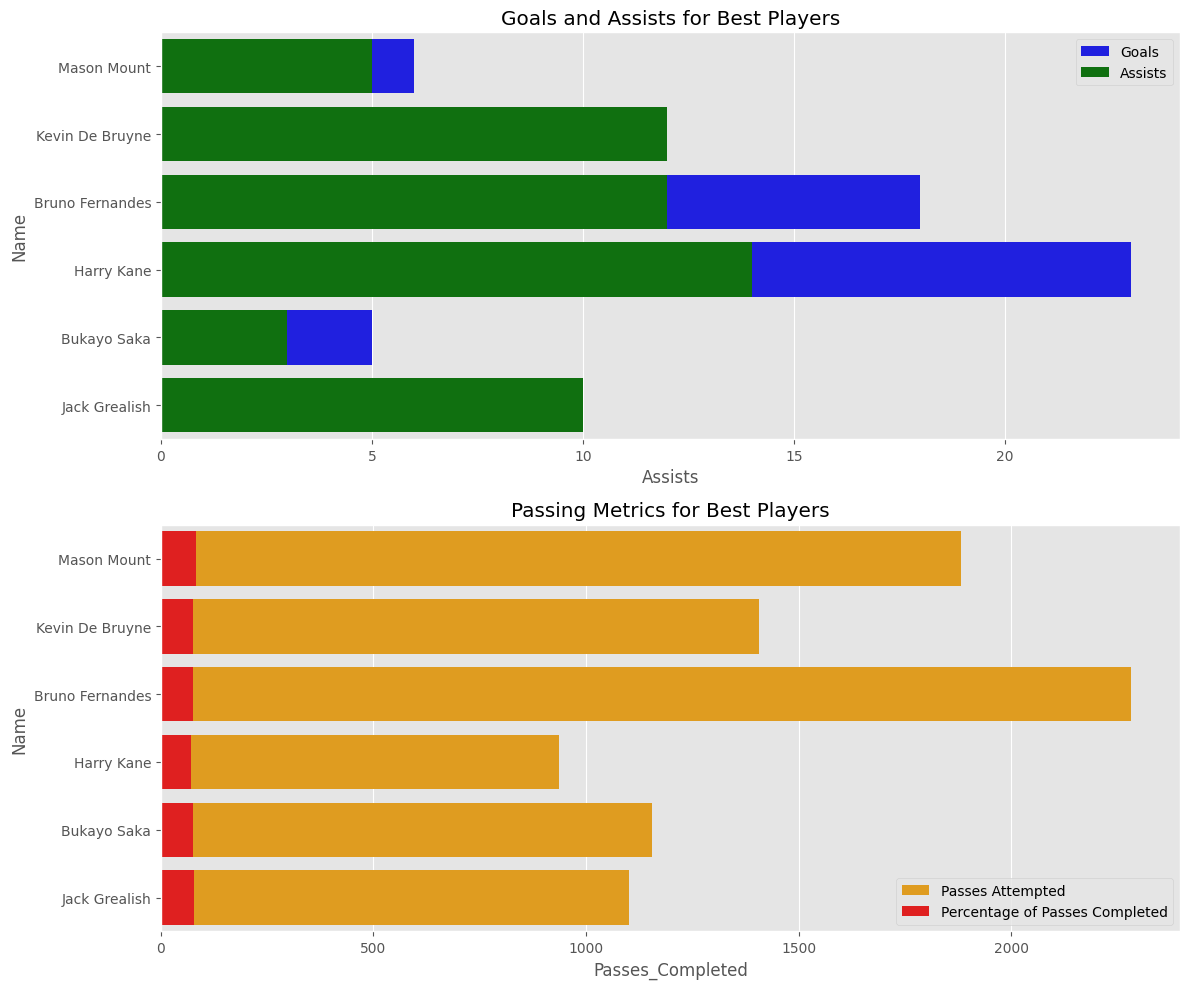

In [36]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Goals and Assists
sns.barplot(x='Goals', y='Name', data=specific_players_data, color='blue', ax=axes[0], label='Goals')
sns.barplot(x='Assists', y='Name', data=specific_players_data, color='green', ax=axes[0], label='Assists')
axes[0].set_title('Goals and Assists for Best Players')
axes[0].legend()

# Plot Passes Attempted and Percentage of Passes Completed
sns.barplot(x='Passes_Attempted', y='Name', data=specific_players_data, color='orange', ax=axes[1], label='Passes Attempted')
sns.barplot(x='Passes_Completed', y='Name', data=specific_players_data, color='red', ax=axes[1], label='Percentage of Passes Completed')
axes[1].set_title('Passing Metrics for Best Players')
axes[1].legend()

plt.tight_layout()
plt.show()

# Discipline Analysis
* Analyze Yellow Cards and Red Cards distribution.
* Identify players with high card counts.

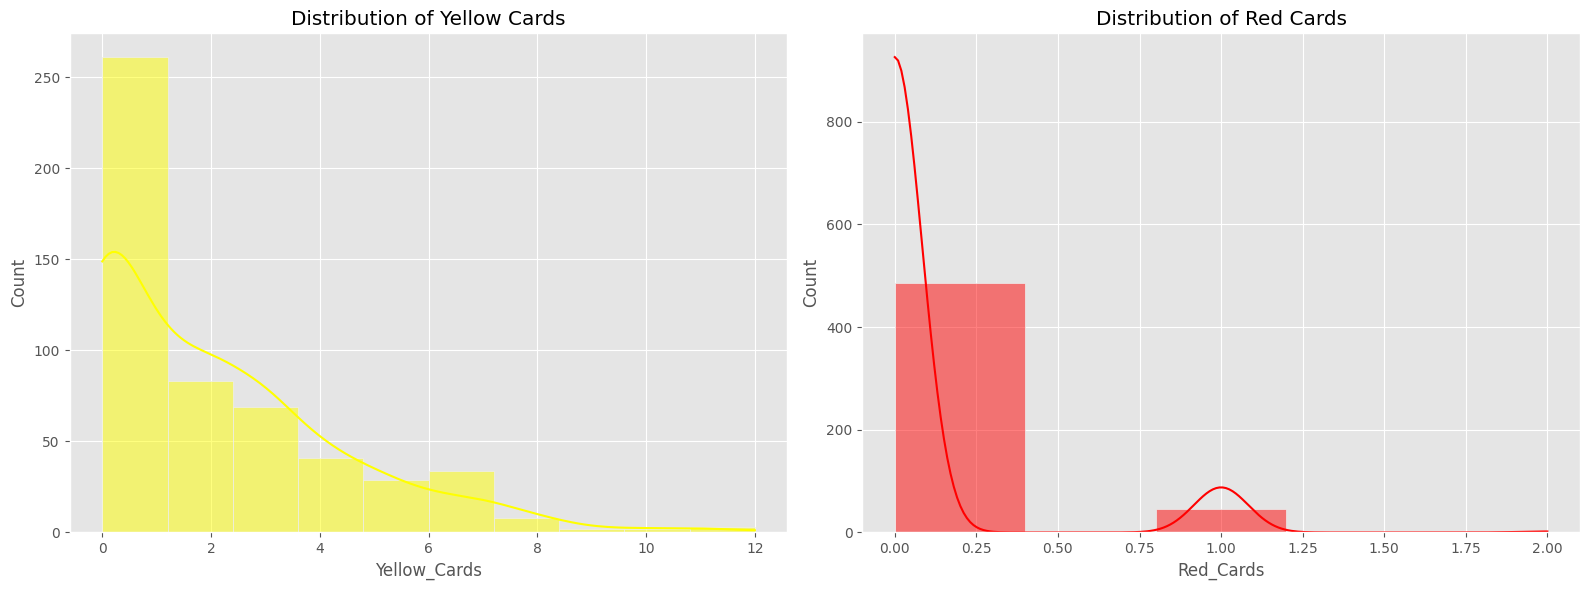

In [34]:
# Discipline Analysis
discipline_data = df[['Name', 'Yellow_Cards', 'Red_Cards']]

# Plot Yellow Cards and Red Cards distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=discipline_data, x='Yellow_Cards', bins=10, kde=True, color='yellow', ax=axes[0])
axes[0].set_title('Distribution of Yellow Cards')

sns.histplot(data=discipline_data, x='Red_Cards', bins=5, kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribution of Red Cards')

plt.tight_layout()
plt.show()

In [35]:
# Identify players with high card counts
high_card_players = discipline_data[(discipline_data['Yellow_Cards'] > 5) | (discipline_data['Red_Cards'] > 0)]
high_card_players = high_card_players.sort_values(by=['Yellow_Cards', 'Red_Cards'], ascending=False)

print("Players with High Card Counts:")
print(high_card_players[['Name', 'Yellow_Cards', 'Red_Cards']])

Players with High Card Counts:
                    Name  Yellow_Cards  Red_Cards
266          John McGinn            12          0
53         Harry Maguire            11          0
480      Conor Gallagher            11          0
270         Douglas Luiz            10          1
218      Kalvin Phillips            10          0
..                   ...           ...        ...
525        Phil Jagielka             1          1
38           John Stones             0          1
62       Anthony Martial             0          1
183           Bernd Leno             0          1
390  Alexandre Jankewitz             0          1

[85 rows x 3 columns]


# Outlier Detection:
* Identify potential outliers in performance metrics.
* Analyze the context behind any extreme values.

In [31]:
# Identify potential outliers in 'Goals'
goals_outliers = df[df['Goals'] > df['Goals'].quantile(0.95)]

# Examine the context of outliers
for _, player_row in goals_outliers.iterrows():
    print(f"Player: {player_row['Name']}, Position: {player_row['Position']}, Playing Time: {player_row['Mins']}, Goals: {player_row['Goals']}")

Player: Raheem Sterling, Position: FW, Playing Time: 2536, Goals: 10
Player: İlkay Gündoğan, Position: MF, Playing Time: 2029, Goals: 13
Player: Bruno Fernandes, Position: MF, Playing Time: 3099, Goals: 18
Player: Marcus Rashford, Position: FW, Playing Time: 2920, Goals: 11
Player: Edinson Cavani, Position: FW, Playing Time: 1375, Goals: 10
Player: Mohamed Salah, Position: FW, Playing Time: 3078, Goals: 22
Player: Sadio Mané, Position: FW, Playing Time: 2810, Goals: 11
Player: Jamie Vardy, Position: FW, Playing Time: 2840, Goals: 15
Player: Kelechi Iheanacho, Position: FW, Playing Time: 1459, Goals: 12
Player: Tomáš Souček, Position: MF, Playing Time: 3419, Goals: 10
Player: Michail Antonio, Position: FW, Playing Time: 1974, Goals: 10
Player: Son Heung-min, Position: FW, Playing Time: 3114, Goals: 17
Player: Harry Kane, Position: FW, Playing Time: 3082, Goals: 23
Player: Gareth Bale, Position: FW, Playing Time: 920, Goals: 11
Player: Pierre-Emerick Aubameyang, Position: FW, Playing Tim

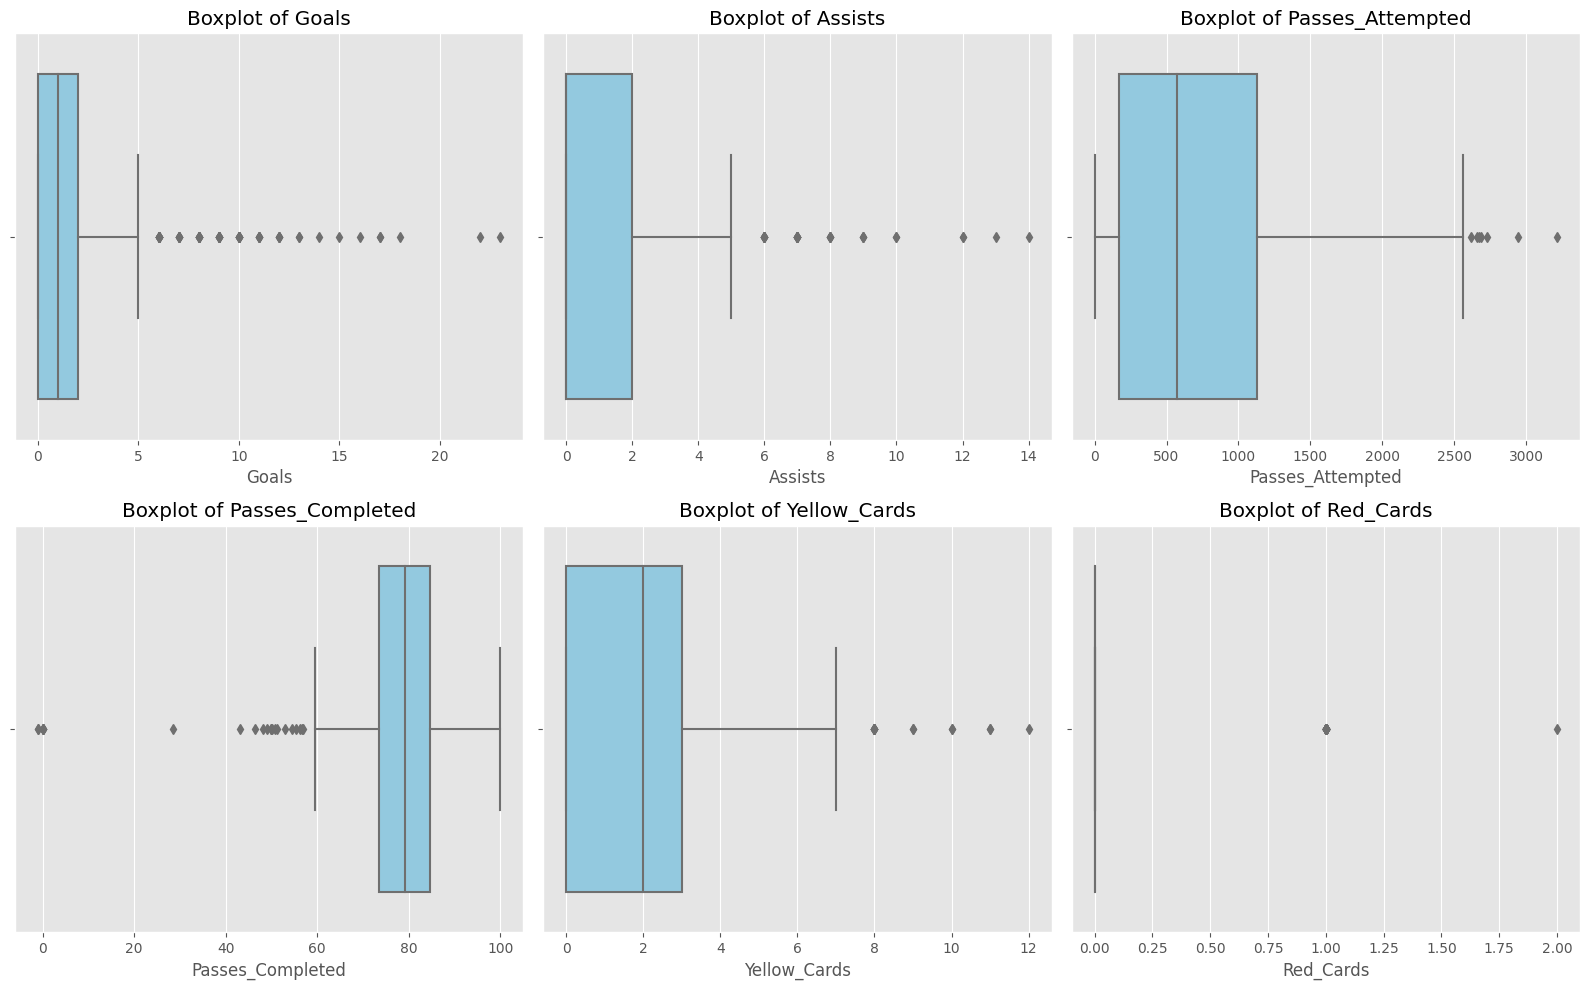

In [30]:
# Create box plots for each performance metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for i, metric in enumerate(performance_metrics.columns):
    sns.boxplot(x=performance_metrics[metric], ax=axes[i//3, i%3], color='skyblue')
    axes[i//3, i%3].set_title(f'Boxplot of {metric}')

plt.tight_layout()
plt.show()

# THE END